Text(0, 0.5, 'Salary')

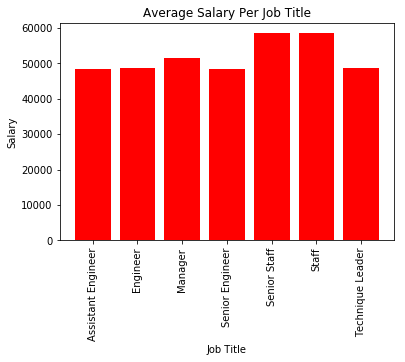

In [25]:
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  AVG salaries by title

conn = pg.connect(database="homework",user="postgres", password="")
sqlcmd = 'SELECT t.title, ROUND(AVG(s.salary),2) AS "AVG Salary" \
          FROM titles as t INNER JOIN salaries as s              \
          ON t.emp_no = s.emp_no GROUP BY t.title'
df = pd.read_sql(sqlcmd, conn)

x_axis = np.arange(len(df))
tick_locations = [value for value in x_axis]

avg_salary = df['AVG Salary']
plt.bar(x_axis, avg_salary, color="r", align="center")
#plt.xticks( rotation="vertical")
plt.xticks(tick_locations, df["title"], rotation="vertical")

# Give the chart a title, x label, and y label
plt.title("Average Salary Per Job Title")
plt.xlabel("Job Title")
plt.ylabel("Salary")